# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Incorporated citipy to determine city based on latitude and longitude
# Did a 'pip install citipy'
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Import API key
from api_keys import weather_api_key

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
# Since output is in imperial units *F and miles, set units to imperial
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Do a query on one city to get format of json
city=cities[0]
response = requests.get(query_url + city).json()
response

{'coord': {'lon': 54.02, 'lat': 32.31},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 68,
  'feels_like': 57.56,
  'temp_min': 68,
  'temp_max': 68,
  'pressure': 1014,
  'humidity': 33},
 'visibility': 10000,
 'wind': {'speed': 13.87, 'deg': 290},
 'clouds': {'all': 40},
 'dt': 1584220310,
 'sys': {'type': 1,
  'id': 7511,
  'country': 'IR',
  'sunrise': 1584239640,
  'sunset': 1584282700},
 'timezone': 12600,
 'id': 143073,
 'name': 'Ardakān',
 'cod': 200}

In [4]:
# Verify data extraction
print(f"coord: {response['coord']}")
print(f"temp : {response['main']['temp']}")
print(f"hum  : {response['main']['humidity']}")
print(f"cloud: {response['clouds']['all']}")
print(f"wind : {response['wind']['speed']}")

coord: {'lon': 54.02, 'lat': 32.31}
temp : 68
hum  : 33
cloud: 40
wind : 13.87


In [5]:
# Initiate lists.  Added coordinates for Vacation part
lat_dat=[]
temp_dat=[]
hum_dat=[]
cloud_dat=[]
wind_speed=[]
counter=0
errors=0
lng_dat=[]
city_list=[]
city_idlist=[]
country=[]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    # Add a sleep function to prevent too many hits
    time.sleep(1)
    response = requests.get(query_url + city).json()
    # Add an error trap for missing cities
    try:
        message=response['message']
        print(f"Error on city number {counter}: {message}")
        counter+=1
        errors+=1
    except KeyError:
        lat_dat.append(response['coord']['lat'])
        temp_dat.append(response['main']['temp'])
        hum_dat.append(response['main']['humidity'])
        cloud_dat.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lng_dat.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        #Allow city ids under ['id'] and ['sys']['id']
        try:
            city_id=response['id']
        except KeyError:
            city_id=response['sys']['id']
        city_name=response['name']
        city_list.append(city_name)
        city_idlist.append(city_id)
        # Print cities as they are retrieved
        print(f"The information received is for: {city_name}")
        print(f"The city ID : {city_id}")
        print(counter)
        counter+=1



The information received is for: Ardakān
The city ID : 143073
0
The information received is for: Ushuaia
The city ID : 3833367
1
Error on city number 2: city not found
Error on city number 3: city not found
The information received is for: Cañon City
The city ID : 5416005
4
The information received is for: Aklavik
The city ID : 5882953
5
The information received is for: Punta Arenas
The city ID : 3874787
6
The information received is for: Ilulissat
The city ID : 3423146
7
The information received is for: Asău
The city ID : 686090
8
The information received is for: Bosaso
The city ID : 64013
9
The information received is for: Longyearbyen
The city ID : 2729907
10
Error on city number 11: city not found
The information received is for: Tulum
The city ID : 3515040
12
The information received is for: Znamenskoye
The city ID : 1485020
13
Error on city number 14: city not found
The information received is for: Oudtshoorn
The city ID : 967106
15
The information received is for: Hamilton
The c

The information received is for: Harper
The city ID : 2276492
126
The information received is for: Saint Anthony
The city ID : 5044290
127
The information received is for: Pevek
The city ID : 2122090
128
The information received is for: Balsas
The city ID : 3406545
129
Error on city number 130: city not found
The information received is for: Ürümqi
The city ID : 1529102
131
The information received is for: Šalčininkai
The city ID : 595016
132
The information received is for: Mahébourg
The city ID : 934322
133
The information received is for: Airai
The city ID : 1651810
134
The information received is for: Lavrentiya
The city ID : 4031637
135
The information received is for: Tūkrah
The city ID : 88834
136
The information received is for: Tautira
The city ID : 4033557
137
The information received is for: Vaini
The city ID : 4032243
138
The information received is for: Broome
The city ID : 5110365
139
Error on city number 140: city not found
The information received is for: Togur
The city

The information received is for: Siedlce
The city ID : 759412
251
The information received is for: Katsuura
The city ID : 2112309
252
The information received is for: Nanzhang
The city ID : 1799574
253
The information received is for: Khatanga
The city ID : 2022572
254
The information received is for: San Quintín
The city ID : 3984997
255
The information received is for: Benghazi
The city ID : 88319
256
The information received is for: Luziânia
The city ID : 3458329
257
The information received is for: Hondomachi-hondo
The city ID : 1862230
258
The information received is for: Ambilobe
The city ID : 1082243
259
The information received is for: Ifanadiana
The city ID : 1064366
260
The information received is for: Bilibino
The city ID : 2126682
261
The information received is for: Acapulco de Juárez
The city ID : 3533462
262
The information received is for: Valera
The city ID : 3625542
263
The information received is for: Chu
The city ID : 1519030
264
The information received is for: Kan

The information received is for: Bariloche
The city ID : 7647007
376
The information received is for: Safranbolu
The city ID : 740430
377
The information received is for: Mayo
The city ID : 4362001
378
The information received is for: Half Moon Bay
The city ID : 5354943
379
The information received is for: Namatanai
The city ID : 2090021
380
The information received is for: Vangaindrano
The city ID : 1054329
381
The information received is for: Uray
The city ID : 1488429
382
The information received is for: Yomou
The city ID : 2414079
383
The information received is for: São Borja
The city ID : 3449340
384
The information received is for: Yar-Sale
The city ID : 1486321
385
The information received is for: Lamu
The city ID : 189741
386
The information received is for: Kushikino
The city ID : 1858041
387
The information received is for: Batemans Bay
The city ID : 2176639
388
The information received is for: Makakilo City
The city ID : 5850554
389
Error on city number 390: city not found


The information received is for: Anna Paulowna
The city ID : 2757220
500
The information received is for: Usinsk
The city ID : 863061
501
The information received is for: Cap Malheureux
The city ID : 934649
502
The information received is for: Chumikan
The city ID : 2025256
503
The information received is for: Krasnosel'kup
The city ID : 1502073
504
The information received is for: Muhos
The city ID : 645765
505
The information received is for: Topolobampo
The city ID : 3981345
506
The information received is for: Bayir
The city ID : 304183
507
The information received is for: Briceni
The city ID : 618512
508
The information received is for: Ganzhou
The city ID : 1810637
509
Error on city number 510: city not found
The information received is for: Eureka
The city ID : 5563397
511
The information received is for: Östersund
The city ID : 2685750
512
Error on city number 513: city not found
The information received is for: Americus
The city ID : 4179667
514
Error on city number 515: city 

In [6]:
good_cities=counter-errors
print(f"Of the {counter} cities requested, {good_cities} were found and {errors} errored out.")

Of the 618 cities requested, 565 were found and 53 errored out.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a panda from the data collected
data_cities={"city":city_list,"id":city_idlist,"lat":lat_dat,"temp":temp_dat,"humidity":hum_dat,"clouds":cloud_dat,"wind":wind_speed,"lng":lng_dat,"Country":country}
weather_df=pd.DataFrame.from_dict(data_cities)

# Export to a csv file
weather_df.to_csv('outputfile_ras.csv')

# Print header of DataFrame
weather_df.head()

,city,id,lat,temp,humidity,clouds,wind,lng,Country
0,Ardakān,143073,32.31,68.00,33,40,13.87,54.02,IR
1,Ushuaia,3833367,-54.80,55.40,47,20,6.93,-68.30,AR
2,Cañon City,5416005,38.44,39.11,80,90,6.98,-105.24,US
3,Aklavik,5882953,68.22,23.70,67,90,9.17,-135.01,CA
4,Punta Arenas,3874787,-53.15,59.00,58,75,20.80,-70.92,CL


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
# Get today's date 
import datetime as dt
d=dt.datetime.today()
today=(f"{d.month}/{d.day}/{d.year}")



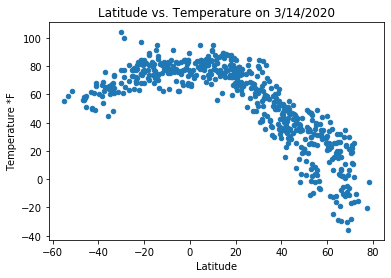

In [10]:
weather_df.plot.scatter(x="lat",y='temp')
plt.xlabel("Latitude")
plt.ylabel("Temperature *F")
plt.title(f"Latitude vs. Temperature on {today}")
plt.savefig("TempVLat.png")
plt.show()


# Plot Latitude vs. Humidity

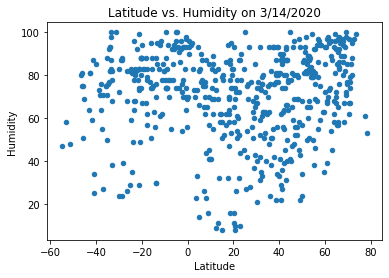

In [11]:
weather_df.plot.scatter(x='lat',y="humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title(f"Latitude vs. Humidity on {today}")
plt.savefig("LatVHum.png")
plt.show()


#### Latitude vs. Cloudiness Plot

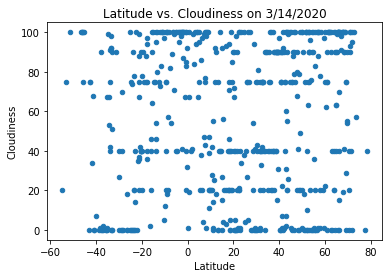

In [12]:
weather_df.plot.scatter(x="lat",y='clouds')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs. Cloudiness on {today}")
plt.savefig("LatVClouds.png")
plt.show()

# The concentration of cloud cover at 20, 40, 75 and 90% indicates a lack of precision in the measurement of cloud cover. (Expected at 0% and 100%)

### Latitude vs. Wind Speed Plot

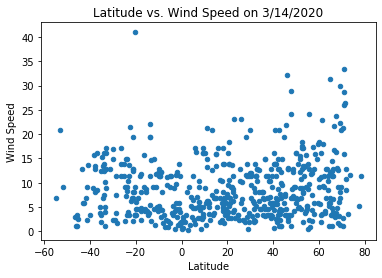

In [13]:
weather_df.plot.scatter(x="lat",y='wind')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Latitude vs. Wind Speed on {today}")
plt.savefig("LatVWind.png")
plt.show()

## Linear Regression

# Applying linear regression on the latitude does not make sense to me. Given we are near the spring equinox, and based on mere inspection and some knowledge of the shape of the earth, I would think a sine function would provide a much better fit (based on sum of the squares of errors). If I were not familiar with the shape of the earth - say, I thought it was flat, I would first try a negative 2nd degree polynomial. These will fit better than 2 lines and have the same degrees of freedom.

# Also if looking for linear correlations, it would make more sense to generate a correlation matrix between the various numerical variable. (i.e. df.cor()) and look for numbers off the diagonal with absolute values closest to 1. Instead of breaking it into hemispheres, it would also be better to use the absolute value of the latitude instead and combine the data. The question was about temperatures relative to the distance from the equator not north of or south of the equator. [I know this is done for simplicity.]

# I had to study graduation to be an actuary, which is the revision of estimates to fit data, so this is nothing compared to a Gompertz fit, which is a fit to e raised to a linear equation, representing the force of mortality. 

In [14]:
# OPTIONAL: Create a function to create Linear Regression plotsnp

def lr(x,y):
    lrx=linregress(x,y)
    slope=lrx.slope
    intercept=lrx.intercept
    start=(x.min())*slope+intercept
    end=(x.max())*slope+intercept
    
    return start,end
            

In [15]:
weather_df.head()

,city,id,lat,temp,humidity,clouds,wind,lng,Country
0,Ardakān,143073,32.31,68.00,33,40,13.87,54.02,IR
1,Ushuaia,3833367,-54.80,55.40,47,20,6.93,-68.30,AR
2,Cañon City,5416005,38.44,39.11,80,90,6.98,-105.24,US
3,Aklavik,5882953,68.22,23.70,67,90,9.17,-135.01,CA
4,Punta Arenas,3874787,-53.15,59.00,58,75,20.80,-70.92,CL


In [16]:
# Create Northern and Southern Hemisphere DataFrame


In [17]:

yankee_df=weather_df[weather_df['lat']>=0]
rebel_df=weather_df[weather_df['lat']<0]


yankee_df.head()

,city,id,lat,temp,humidity,clouds,wind,lng,Country
0,Ardakān,143073,32.31,68.00,33,40,13.87,54.02,IR
2,Cañon City,5416005,38.44,39.11,80,90,6.98,-105.24,US
3,Aklavik,5882953,68.22,23.70,67,90,9.17,-135.01,CA
5,Ilulissat,3423146,69.22,3.20,71,75,8.05,-51.10,GL
6,Asău,686090,46.43,43.72,48,90,12.75,26.40,RO


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

# If there are multiple temperatures at the same latitude, to use the max will add bias to the results. The multiple temperatures should be included to maximize the fit's reliability. I could have taken the max of temps at each latitude, but used the temps provided. There are only a few duplicate latitudes anyway.

In [18]:
# Check for multiple latitudes

print(f"There are {len(weather_df['lat'])} latitudes  {len(weather_df['lat'].unique())} unique latitudes on the database.")
      

There are 565 latitudes  551 unique latitudes on the database.


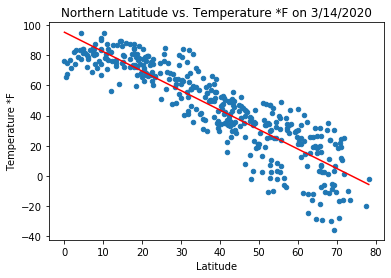

In [19]:

yankee_df.plot.scatter(x="lat",y='temp')
plt.xlabel("Latitude")
plt.ylabel("Temperature *F")
plt.title(f"Northern Latitude vs. Temperature *F on {today}")
x=yankee_df['lat']
y=yankee_df['temp']
ys=lr(x,y)
plt.plot((x.min(),x.max()),(ys[0],ys[1]),color='r') 
plt.savefig("NLatVTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

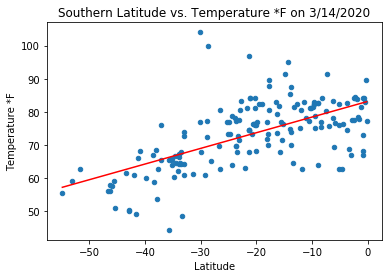

In [20]:

rebel_df.plot.scatter(x="lat",y='temp')
plt.xlabel("Latitude")
plt.ylabel("Temperature *F")
plt.title(f"Southern Latitude vs. Temperature *F on {today}")
x=rebel_df['lat']
y=rebel_df['temp']
ys=lr(x,y)
plt.plot((x.min(),x.max()),(ys[0],ys[1]),color='r') 
plt.savefig("SLatVTemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

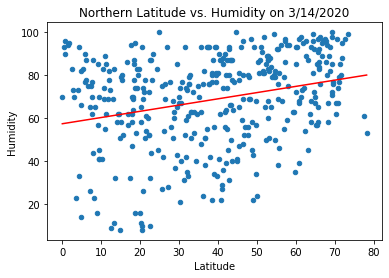

In [21]:
yankee_df.plot.scatter(x="lat",y='humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Northern Latitude vs. Humidity on {today}")
x=yankee_df['lat']
y=yankee_df['humidity']
ys=lr(x,y)
plt.plot((x.min(),x.max()),(ys[0],ys[1]),color='r') 
plt.savefig("NLatVHum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

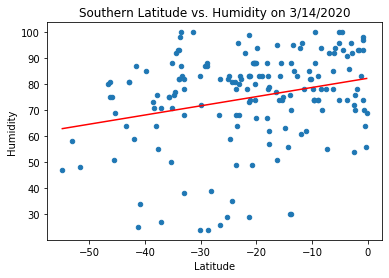

In [22]:
rebel_df.plot.scatter(x="lat",y='humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Southern Latitude vs. Humidity on {today}")
x=rebel_df['lat']
y=rebel_df['humidity']
ys=lr(x,y)
plt.plot((x.min(),x.max()),(ys[0],ys[1]),color='r') 
plt.savefig("SLatVHum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

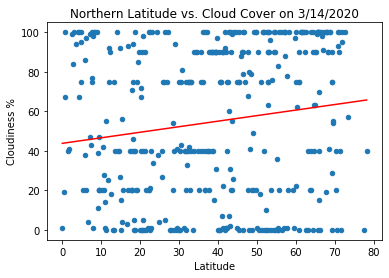

In [23]:
yankee_df.plot.scatter(x="lat",y='clouds')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"Northern Latitude vs. Cloud Cover on {today}")
x=yankee_df['lat']
y=yankee_df['clouds']
ys=lr(x,y)
plt.plot((x.min(),x.max()),(ys[0],ys[1]),color='r') 
plt.savefig("NLatVCld.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

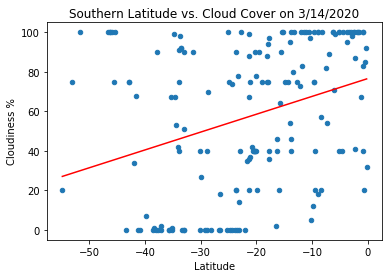

In [24]:
rebel_df.plot.scatter(x="lat",y='clouds')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"Southern Latitude vs. Cloud Cover on {today}")
x=rebel_df['lat']
y=rebel_df['clouds']
ys=lr(x,y)
plt.plot((x.min(),x.max()),(ys[0],ys[1]),color='r') 
plt.savefig("SLatVCld.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

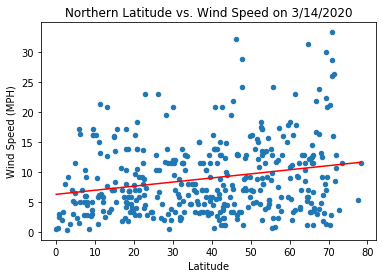

In [25]:
yankee_df.plot.scatter(x="lat",y='wind')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title(f"Northern Latitude vs. Wind Speed on {today}")
x=yankee_df['lat']
y=yankee_df['wind']
ys=lr(x,y)
plt.plot((x.min(),x.max()),(ys[0],ys[1]),color='r') 
plt.savefig("NLatVWind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

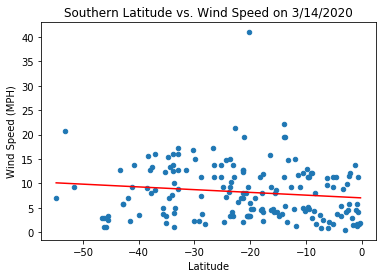

In [26]:
rebel_df.plot.scatter(x="lat",y='wind')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title(f"Southern Latitude vs. Wind Speed on {today}")
x=rebel_df['lat']
y=rebel_df['wind']
ys=lr(x,y)
plt.plot((x.min(),x.max()),(ys[0],ys[1]),color='r') 
plt.savefig("SLatVWind.png")
plt.show()